In [13]:
# load all the necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import LeaveOneOut
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import numpy as np 

In [14]:
# load the dataset
iris_dataset = pd.read_csv('data/IRIS.csv')

# print the ds to the screen 
iris_dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
# make statistics of of the ds
iris_dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
# check the distribution of species
iris_distribution = pd.crosstab(index=iris_dataset["species"], columns="count") 
iris_distribution

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [17]:
# take the variables 
Xiris_setosa=iris_dataset.loc[iris_dataset["species"]=="Iris-setosa"]
iris_virginica=iris_dataset[iris_dataset["species"]=="Iris-virginica"]
iris_versicolor=iris_dataset.loc[iris_dataset["species"]=="Iris-versicolor"]

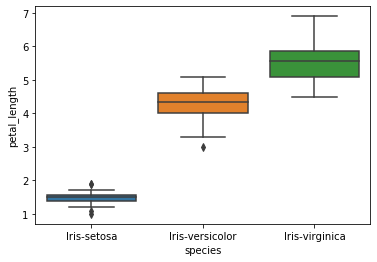

In [18]:
# make plots
sns.boxplot(x="species",y="petal_length",data=iris_dataset)

In [19]:
# prepare the array to feed the network
X = iris_dataset.iloc[:, [0, 1, 2, 3]].values

In [20]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
# instance of Kfold 
kmean = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

In [22]:
# use Loocv to crtoss validate the results 
loo = LeaveOneOut()

# ctn to show the results
ctn = 0 

for train_index, test_index in loo.split(X):
    X_train = np.array(X[train_index])
    prediction = kmean.fit_predict(X_train)

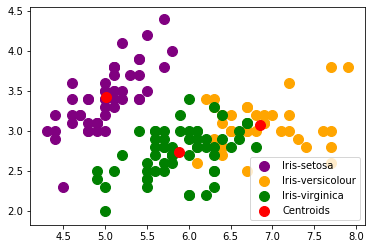

In [23]:
# show clusters
X = X[0:149]

#Visualising the clusters
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()

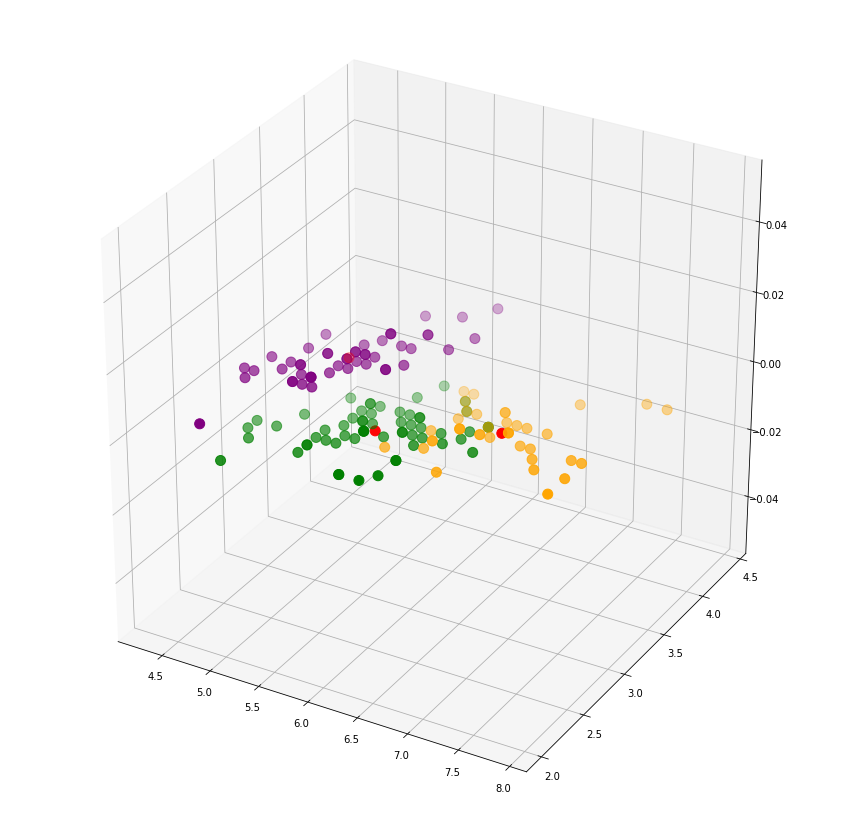

In [24]:
# 3d scatterplot using matplotlib
X = X[:149]

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[prediction == 0, 0], X[prediction == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X[prediction == 1, 0], X[prediction == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[prediction == 2, 0], X[prediction == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()